In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
py.offline.init_notebook_mode(connected=True)

# Análise dos Dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#Verificando registros faltantes
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Visualização dos Dados

In [ ]:
plt.style.use('fivethirtyeight')

Contagem de amostra por sexo

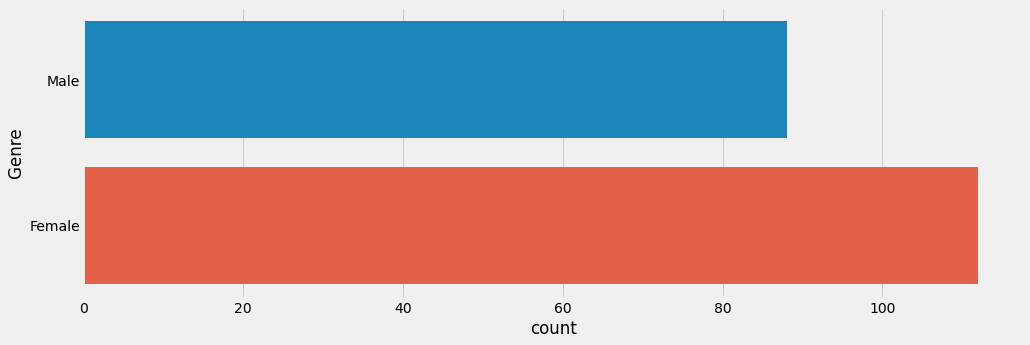

In [ ]:
plt.figure(1, figsize=(15,5))
sns.countplot(y= 'Genre', data= df)
plt.show()

Idade vs Renda Anual

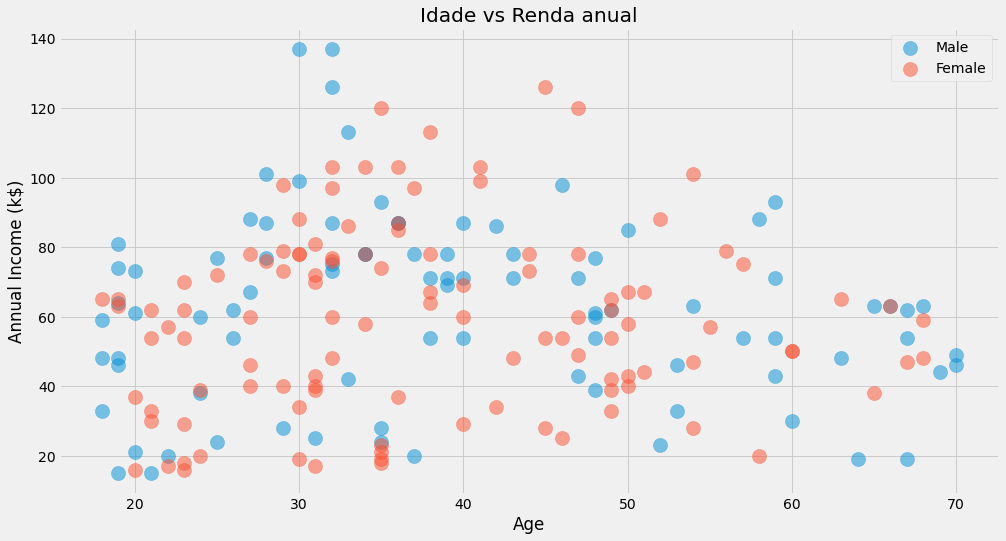

In [ ]:
plt.figure(1, figsize=(15,8))
for genre in ['Male', 'Female']:
  plt.scatter(x='Age', y='Annual Income (k$)', data = df[df['Genre']== genre],
              s= 200, alpha= 0.5, label= genre)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Idade vs Renda anual')
plt.legend()
plt.show()



Renda Anual vs Pontuação de Gastos

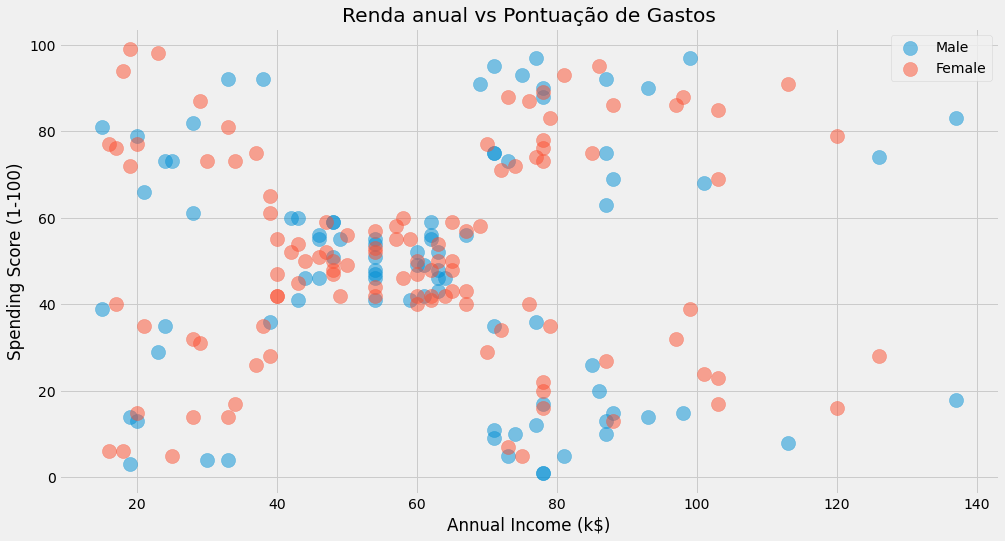

In [ ]:
plt.figure(1, figsize=(15,8))
for genre in ['Male', 'Female']:
  plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data = df[df['Genre']== genre],
              s= 200, alpha= 0.5, label= genre)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Renda anual vs Pontuação de Gastos')
plt.legend()
plt.show()


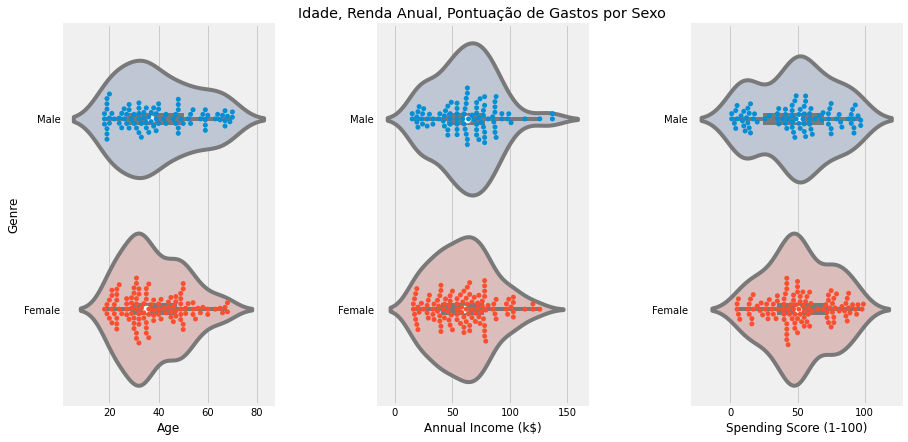

In [ ]:
%matplotlib inline
plt.figure(1, figsize=(15,7))
n = 0
for cols in ['Age','Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(left=0.125, right=0.9, hspace=0.5, wspace=0.5)
    sns.violinplot(x = cols, y='Genre',data= df, palette= 'vlag')
    sns.swarmplot(x = cols, y='Genre',data= df)
    plt.ylabel('Genre' if n == 1 else '')
    plt.title('Idade, Renda Anual, Pontuação de Gastos por Sexo' if n== 2 else '')
plt.show()

Selecionando o número de clusters através do método Elbow(Soma das distâncias quadráticas entre clusters) 

In [ ]:
x2 = df[['Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values
#inertia - soma das distâncias quadráticas
inertia=[]
for n in range(1, 11):
    algorithum = (KMeans(n_clusters=n))
    algorithum.fit(x2)
    inertia.append(algorithum.inertia_)

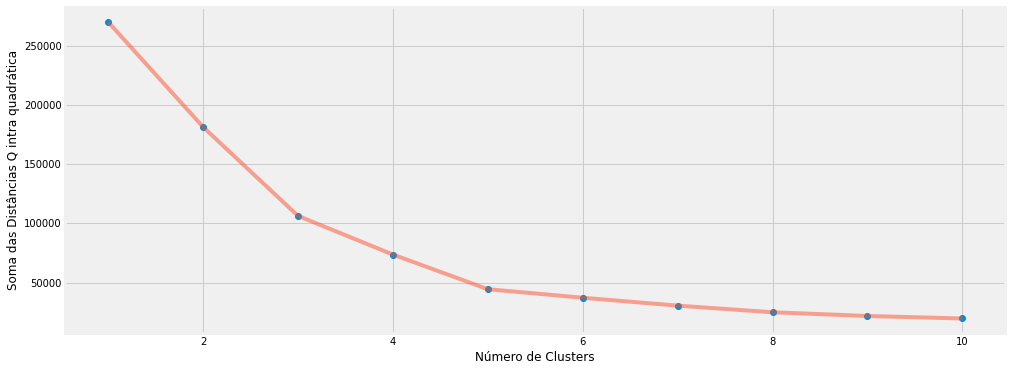

In [ ]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha= 0.5)
plt.xlabel('Número de Clusters'), plt.ylabel('Soma das Distâncias Q intra quadrática')
plt.show()

Inicializando e Computatando o Kmeans com valor de 4 clusters

In [ ]:
algorithum = (KMeans(n_clusters=4))
algorithum.fit(x2)

KMeans(n_clusters=4)

Visualizando os grupos criados e seus centroids

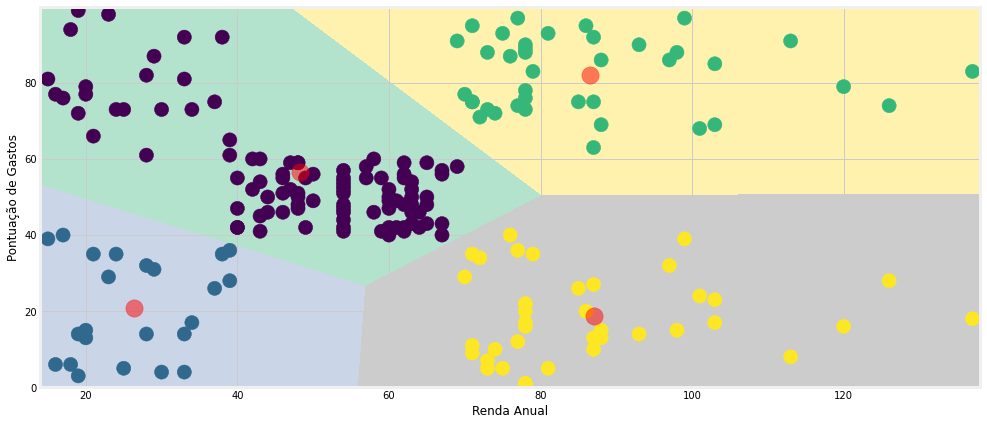

In [ ]:
labels_2 = algorithum.labels_
centroids2 = algorithum.cluster_centers_
#obtem os valores mínimos e maximos e organiza o shape
h = 0.02
x_min, x_max = x2[:, 0].min() -1, x2[:, 0].max() + 1
y_min, y_max = x2[:, 1].min() -1, x2[:, 1].max() + 1
#cria uma grade densa de pontos para amostrar
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#Convertendo para arrays numpy
npx = xx.ravel()
npy = yy.ravel()
#convertendo para lista de 2D
pt_amostra = np.c_[npx,npy]
#gerando rótulos de previsão para cada ponto
Z = algorithum.predict(pt_amostra)

plt.figure(1, figsize=(15,7))
plt.clf()
Z= Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(),yy.max()),
           cmap= plt.cm.Pastel2,
           aspect= 'auto', 
           origin = 'lower') 
plt.scatter(x='Annual Income (k$)', y ='Spending Score (1-100)', data= df, c = labels_2, s = 200)
plt.scatter(x= centroids2[:, 0], y = centroids2[:, 1], c = 'red', s = 300, alpha= 0.5)
plt.xlabel('Renda Anual'), plt.ylabel('Pontuação de Gastos')
plt.show()